In [68]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
iNat_density = pd.read_csv('./inat_dens_df.csv')
eBird_density = pd.read_csv('./ebird_dens_df.csv')

In [21]:
iNat_density_filtered = iNat_density[iNat_density['AVIBASEID'].isin(eBird_density['AVIBASEID'].values)]

In [22]:
iNat_density2 = iNat_density_filtered.pivot_table(index='AVIBASEID', columns='WEEK', values='smoothed_counts').sort_index()

In [23]:
eBird_density2 = eBird_density.pivot_table(index='AVIBASEID', columns='WEEK', values='smoothed_counts').sort_index()

In [33]:
iNat_density2.fillna(value=0, inplace=True)

In [34]:
eBird_density2.fillna(value=0, inplace=True)

In [35]:
iNat_birds_total_count = np.sum(iNat_density2.values, axis=1)

In [36]:
eBird_total_count = np.sum(eBird_density2.values, axis=1)

In [39]:
multiplier_ratios = eBird_total_count/iNat_birds_total_count

In [40]:
multiplier_ratios

array([4.81969784e+02, 1.05690236e+04, 1.52511815e+02, 8.77485376e+02,
       5.57950345e+02, 1.37784376e+03, 3.24925079e+02, 9.44471204e+02,
       1.89337954e+02, 1.25620842e-01, 7.44778985e+01, 4.35474603e+02,
       1.90873827e-01, 5.24432221e+03, 1.85497626e+03, 2.40294831e+02,
       4.91049176e+02, 3.03136528e+02, 8.54031777e+01, 7.54174814e+01,
       1.80182057e+02, 1.35288990e+02, 8.28564909e+02, 4.10622891e+02,
       2.70912157e+03, 1.58494001e+03, 1.10378279e+03, 2.68567680e+02,
       8.11104121e+01, 5.85230341e+03, 8.31131348e+02, 9.99066987e+01,
       6.97001579e+01, 3.49069079e+02, 4.49815546e+05, 7.68902730e+02,
       9.28106807e+01, 2.79253795e+03, 2.34028074e+02, 1.97087876e+02,
       1.18949472e+04, 1.26539839e+02, 7.21917822e+02, 7.76454398e+01,
       4.23952181e+02, 6.00819431e+01, 6.43621585e+01, 2.85551807e+02,
       3.17979325e-03, 4.69601117e+03, 7.76754838e+03, 5.14121972e+02,
       1.87822358e+02, 3.79583033e+01, 2.82140820e+02, 1.35116640e+02,
      

In [42]:
np.mean(multiplier_ratios)

4548.992869448593

In [43]:
np.std(multiplier_ratios)

38593.55733173665

In [120]:
derive_summary_stats(multiplier_ratios)

(4548.992869448593,
 38593.55733173665,
 349.0690789246921,
 array([3.17979325e-03, 7.16112541e+01, 1.33401280e+02, 1.73658993e+02,
        2.45557527e+02, 3.49069079e+02, 4.87540506e+02, 7.66085573e+02,
        1.37644681e+03, 2.75917140e+03, 4.49815546e+05]))

In [44]:
np.max(multiplier_ratios)

449815.5458002649

In [45]:
np.min(multiplier_ratios)

0.003179793253209798

<Axes: >

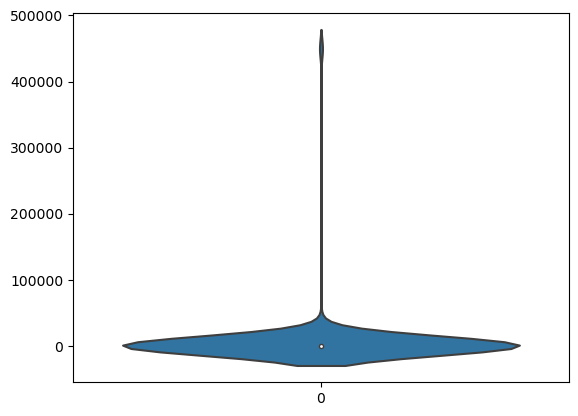

In [47]:
sns.violinplot(multiplier_ratios)

In [49]:
np.sort(multiplier_ratios)

array([3.17979325e-03, 1.25620842e-01, 1.90873827e-01, 2.35453269e+01,
       3.79583033e+01, 4.75982766e+01, 4.98382945e+01, 4.99790595e+01,
       5.47713922e+01, 5.55013390e+01, 5.93876612e+01, 6.00819431e+01,
       6.43621585e+01, 6.97001579e+01, 7.44778985e+01, 7.54174814e+01,
       7.57669281e+01, 7.76454398e+01, 8.11104121e+01, 8.54031777e+01,
       8.92066154e+01, 9.28106807e+01, 9.99066987e+01, 1.06857252e+02,
       1.19055903e+02, 1.26466119e+02, 1.26539839e+02, 1.35116640e+02,
       1.35288990e+02, 1.46480989e+02, 1.49447769e+02, 1.52511815e+02,
       1.56928142e+02, 1.60096020e+02, 1.63174633e+02, 1.64785301e+02,
       1.69718564e+02, 1.70578408e+02, 1.70934321e+02, 1.71761100e+02,
       1.72471574e+02, 1.78408672e+02, 1.80182057e+02, 1.87822358e+02,
       1.89337954e+02, 1.92565631e+02, 1.97087876e+02, 2.19752849e+02,
       2.21855250e+02, 2.21894045e+02, 2.27765910e+02, 2.34028074e+02,
       2.34770446e+02, 2.40294831e+02, 2.49065991e+02, 2.54109274e+02,
      

/var/folders/ms/2ygwp03d4b5526gc0h51spqh0000gn/T/ipykernel_28638/2756468928.py:1: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.1`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.13.0.

  sns.kdeplot(np.sort(multiplier_ratios)[4:-5], bw=0.1)


<Axes: ylabel='Density'>

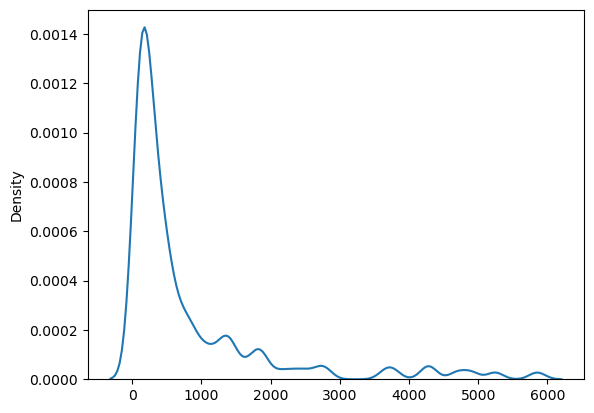

In [56]:
sns.kdeplot(np.sort(multiplier_ratios)[4:-5], bw=0.1)

In [57]:
np.median(multiplier_ratios)

349.0690789246921

In [58]:
iNat_density3 = iNat_density2.copy()

In [64]:
iNat_density3 = (iNat_density2.values.T/iNat_birds_total_count).T

In [65]:
eBird_density3 = (eBird_density2.values.T/eBird_total_count).T

In [66]:
np.sum(iNat_density3), np.sum(eBird_density3)

(135.0, 135.0)

(0.0, 0.05)

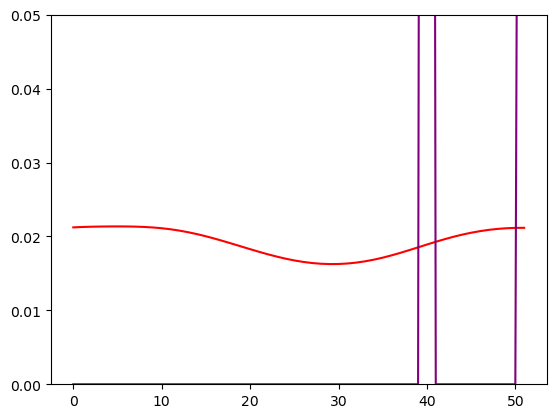

In [139]:
x = 48
plt.plot(iNat_density3[x, :], color='red')
plt.plot(eBird_density3[x, :], color='purple')
plt.ylim((0, 0.05))

In [82]:
from sklearn.decomposition import PCA

In [83]:
pca_iNat = PCA().fit(iNat_density3)
pca_eBird = PCA().fit(eBird_density3)

In [131]:
np.cumsum(pca_iNat.explained_variance_ratio_)

array([0.69658884, 0.96220078, 0.98202539, 0.99847833, 0.99945739,
       0.99996696, 0.99998301, 0.99999166, 0.99999916, 0.99999991,
       0.99999996, 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        ])

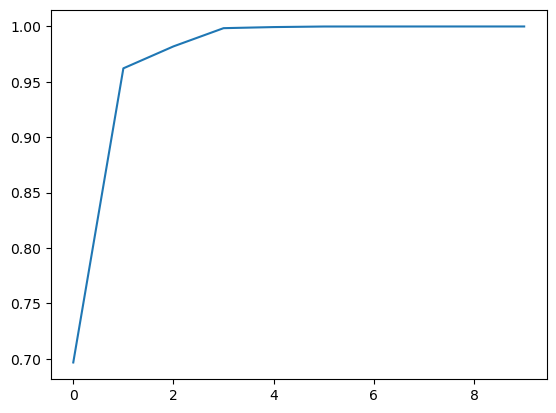

In [86]:
plt.plot(np.cumsum(pca_iNat.explained_variance_ratio_)[0:10])

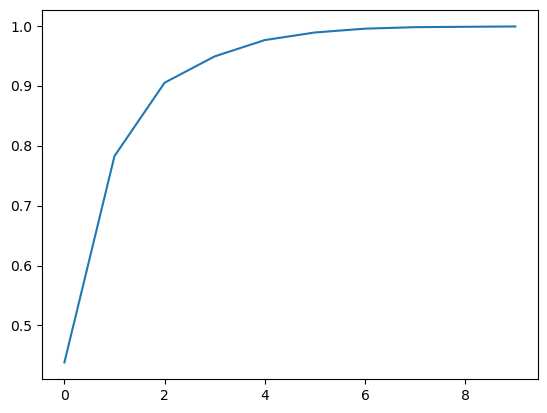

In [87]:
plt.plot(np.cumsum(pca_eBird.explained_variance_ratio_)[0:10])

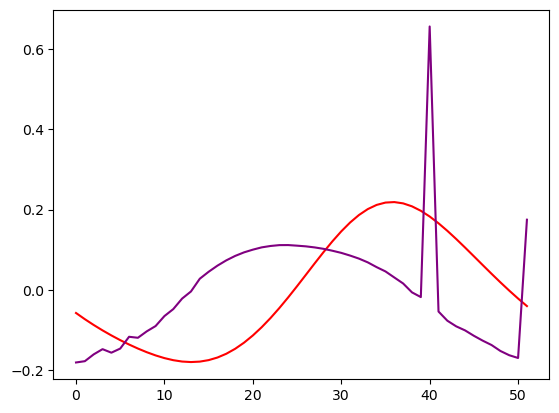

In [133]:
x = 1
plt.plot(pca_iNat.components_[x], color='red')
plt.plot(pca_eBird.components_[x], color='purple')

In [89]:
from scipy.stats import wasserstein_distance

In [94]:
wasserstein_distances_all_pca = [wasserstein_distance(pca_iNat.components_[x], pca_eBird.components_[x]) for x in range(52)]

In [95]:
wasserstein_distances_all = [wasserstein_distance(iNat_density3[x, :], eBird_density3[x, :]) for x in range(135)]

In [100]:
def derive_summary_stats(x):
    return np.mean(x), np.std(x), np.median(x), np.quantile(x, np.linspace(0, 1 ,11))

In [101]:
wasserstein_distances_all_pca

[0.04623081777373598,
 0.039824746950663986,
 0.02565424233574214,
 0.05078279273916756,
 0.019276490763247715,
 0.013694767251531665,
 0.03964498334362997,
 0.023058894670391947,
 0.044786106881351956,
 0.06478205363096938,
 0.06445758654153279,
 0.06501700945729946,
 0.030359085058002312,
 0.08208857965396717,
 0.08092660264133139,
 0.020469911794247033,
 0.03310829915897847,
 0.04774224309412835,
 0.06092101586354299,
 0.0301417838711682,
 0.041585116767302255,
 0.033653798333317865,
 0.03676668651242764,
 0.02039748712112396,
 0.04549275371626428,
 0.033837486726445404,
 0.016416455996858512,
 0.0549576147008686,
 0.035724553719374844,
 0.02583494715690976,
 0.04534756680984019,
 0.03403344921491012,
 0.03328424871135357,
 0.039448855829637974,
 0.022579379369507796,
 0.03209907283426503,
 0.023776665312149895,
 0.019077745465858876,
 0.1437937086070123,
 0.025084297039367737,
 0.02619284791900503,
 0.016914908992255225,
 0.025930998353154152,
 0.028463046116420056,
 0.022478629873

In [138]:
np.argmax(wasserstein_distances_all)

48

In [103]:
derive_summary_stats(wasserstein_distances_all)

(0.003256345726059614,
 0.0041995585345222415,
 0.0022834691524179942,
 array([0.00015915, 0.00069854, 0.0010511 , 0.00149855, 0.00186766,
        0.00228347, 0.00268859, 0.00337882, 0.00417426, 0.00639537,
        0.036819  ]))

In [104]:
derive_summary_stats(wasserstein_distances_all_pca)

(0.04241282722812129,
 0.02861791886994074,
 0.03374564252988163,
 array([0.01369477, 0.02004192, 0.02320245, 0.02586376, 0.0302287 ,
        0.03374564, 0.03956653, 0.0454492 , 0.05447245, 0.07016825,
        0.16798182]))

In [114]:
iNat_density2.index

Index(['00124D98', '01060BFD', '018B3169', '03AC32BA', '0413ED30', '06B9BD24',
       '0716A71C', '0783A7EA', '0ADA5F17', '0B1B2EB6',
       ...
       'F6C6C3F7', 'F6CA75F0', 'F9305BAA', 'F93AC929', 'FB738385', 'FC366114',
       'FD2B0309', 'FED3756C', 'FF592882', 'FFF61080'],
      dtype='object', name='AVIBASEID', length=135)

In [119]:
eBird_density2.values[4, :]

array([2541.33988856, 2368.79712471, 2204.98863119, 2050.95641648,
       1907.16213407, 1773.48248042, 1649.243981  , 1533.29785626,
       1424.13658973, 1320.05667997, 1219.37676809, 1120.72551393,
       1023.41353256,  927.88325882,  836.16343925,  752.12387392,
        681.19050961,  629.24824197,  600.94397452,  598.26446865,
        620.31007111,  664.30921618,    0.        ,    0.        ,
          0.        ,    0.        ,    0.        , 1265.83793442,
       1424.20913938, 1606.51227623, 1814.84891596, 2047.08996149,
       2295.55432917, 2548.18542027, 2791.65944053, 3014.48044095,
       3208.60926506, 3369.54781065, 3495.58172853, 3586.84968797,
       3644.57511382, 3670.53989122, 3666.76664291, 3635.35101181,
       3578.39309384, 3497.99068735, 3396.26787529, 3275.41984665,
       3137.75993126, 2985.75853854, 2822.0665209 , 2649.51769708])